In [17]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot
import numpy as np

from selection_methods import SelectionMethod

In [19]:
vapeplot.set_palette('cool')
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 18})

In [20]:
path_data = "../../results_explored_by_task/antiparasitic/"
list_documents = os.listdir(path_data)
len(list_documents)

24

In [21]:
list_df = []

for encoder in list_documents:
    list_explored = os.listdir(f"{path_data}{encoder}")
    for element in list_explored:

        df_data = pd.read_csv(f"{path_data}{encoder}/{element}")
        df_data['encoder'] = encoder
        list_df.append(df_data)
df_results = pd.concat(list_df, axis=0)
df_results

,description,validation_accuracy,validation_f1_score,validation_precision,validation_recall,validation_mcc,fit_time,score_time,train_f1_weighted,train_recall_weighted,train_precision_weighted,train_accuracy,iteration,encoder
0,KNeighbors,0.666667,0.638049,0.807692,0.666667,0.473665,0.001865,0.010874,0.502212,0.543333,0.503730,0.543333,1384,Group_4
1,DecisionTree,0.454545,0.454545,0.454545,0.454545,-0.100000,0.002354,0.004399,0.682626,0.688333,0.708212,0.688333,1384,Group_4
2,Bagging,0.757576,0.758021,0.764037,0.757576,0.520299,0.016166,0.006007,0.665739,0.675000,0.682128,0.675000,1384,Group_4
3,RandomForest,0.606061,0.599327,0.602814,0.606061,0.195519,0.098802,0.011030,0.745932,0.752500,0.771671,0.752500,1384,Group_4
4,ExtraTrees,0.636364,0.626573,0.636364,0.636364,0.258199,0.075962,0.011262,0.732884,0.740000,0.755242,0.740000,1384,Group_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.515152,0.525926,0.598997,0.515152,0.086711,1.018121,0.009064,0.601651,0.610000,0.612732,0.610000,7666,prottrans_uniref
7,Hist Gradient Boosting,0.636364,0.642857,0.653846,0.636364,0.219265,0.304534,0.009953,0.671706,0.689167,0.735421,0.689167,7666,prottrans_uniref
8,SVC,0.333333,0.166667,0.111111,0.333333,0.000000,0.007419,0.009166,0.416203,0.571667,0.327451,0.571667,7666,prottrans_uniref
9,Gaussian Process,0.545455,0.552995,0.646154,0.545455,0.175412,0.010730,0.009524,0.504314,0.518333,0.512813,0.518333,7666,prottrans_uniref


In [22]:
df_results["overffiting_accuracy"] = df_results["validation_accuracy"]/df_results["train_accuracy"]
df_results["overffiting_f1"] = df_results["validation_f1_score"]/df_results["train_f1_weighted"]
df_results["overffiting_precision"] = df_results["validation_precision"]/df_results["train_precision_weighted"]
df_results["overffiting_recall"] = df_results["validation_recall"]/df_results["train_recall_weighted"]
df_results

,description,validation_accuracy,validation_f1_score,validation_precision,validation_recall,validation_mcc,fit_time,score_time,train_f1_weighted,train_recall_weighted,train_precision_weighted,train_accuracy,iteration,encoder,overffiting_accuracy,overffiting_f1,overffiting_precision,overffiting_recall
0,KNeighbors,0.666667,0.638049,0.807692,0.666667,0.473665,0.001865,0.010874,0.502212,0.543333,0.503730,0.543333,1384,Group_4,1.226994,1.270477,1.603423,1.226994
1,DecisionTree,0.454545,0.454545,0.454545,0.454545,-0.100000,0.002354,0.004399,0.682626,0.688333,0.708212,0.688333,1384,Group_4,0.660357,0.665878,0.641821,0.660357
2,Bagging,0.757576,0.758021,0.764037,0.757576,0.520299,0.016166,0.006007,0.665739,0.675000,0.682128,0.675000,1384,Group_4,1.122334,1.138617,1.120079,1.122334
3,RandomForest,0.606061,0.599327,0.602814,0.606061,0.195519,0.098802,0.011030,0.745932,0.752500,0.771671,0.752500,1384,Group_4,0.805396,0.803460,0.781180,0.805396
4,ExtraTrees,0.636364,0.626573,0.636364,0.636364,0.258199,0.075962,0.011262,0.732884,0.740000,0.755242,0.740000,1384,Group_4,0.859951,0.854943,0.842595,0.859951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.515152,0.525926,0.598997,0.515152,0.086711,1.018121,0.009064,0.601651,0.610000,0.612732,0.610000,7666,prottrans_uniref,0.844511,0.874137,0.977585,0.844511
7,Hist Gradient Boosting,0.636364,0.642857,0.653846,0.636364,0.219265,0.304534,0.009953,0.671706,0.689167,0.735421,0.689167,7666,prottrans_uniref,0.923381,0.957051,0.889077,0.923381
8,SVC,0.333333,0.166667,0.111111,0.333333,0.000000,0.007419,0.009166,0.416203,0.571667,0.327451,0.571667,7666,prottrans_uniref,0.583090,0.400446,0.339321,0.583090
9,Gaussian Process,0.545455,0.552995,0.646154,0.545455,0.175412,0.010730,0.009524,0.504314,0.518333,0.512813,0.518333,7666,prottrans_uniref,1.052324,1.096531,1.260020,1.052324


In [23]:
df_results_train = df_results[['description', 'train_f1_weighted',
            'train_recall_weighted', 'train_precision_weighted', 'train_accuracy',
            'iteration', 'encoder']]

df_results_train.columns = ["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]
df_results_train['Stage'] = "Training"

df_results_validation = df_results[['description', 'validation_accuracy', 'validation_f1_score', 'validation_precision',
    'validation_recall', 'validation_mcc', 'iteration', 'encoder']]

df_results_validation.columns = ["Algorithm", "Accuracy", "F1", "Precision", "Recall", "MCC", "Iteration", "Encoder"]
df_results_validation['Stage'] = "Validating"

df_concat = pd.concat([df_results_train, df_results_validation], axis=0)
df_concat

,Algorithm,F1,Recall,Precision,Accuracy,Iteration,Encoder,Stage,MCC
0,KNeighbors,0.502212,0.543333,0.503730,0.543333,1384,Group_4,Training,NaN
1,DecisionTree,0.682626,0.688333,0.708212,0.688333,1384,Group_4,Training,NaN
2,Bagging,0.665739,0.675000,0.682128,0.675000,1384,Group_4,Training,NaN
3,RandomForest,0.745932,0.752500,0.771671,0.752500,1384,Group_4,Training,NaN
4,ExtraTrees,0.732884,0.740000,0.755242,0.740000,1384,Group_4,Training,NaN
...,...,...,...,...,...,...,...,...,...
6,GradientBoosting,0.525926,0.515152,0.598997,0.515152,7666,prottrans_uniref,Validating,0.086711
7,Hist Gradient Boosting,0.642857,0.636364,0.653846,0.636364,7666,prottrans_uniref,Validating,0.219265
8,SVC,0.166667,0.333333,0.111111,0.333333,7666,prottrans_uniref,Validating,0.000000
9,Gaussian Process,0.552995,0.545455,0.646154,0.545455,7666,prottrans_uniref,Validating,0.175412


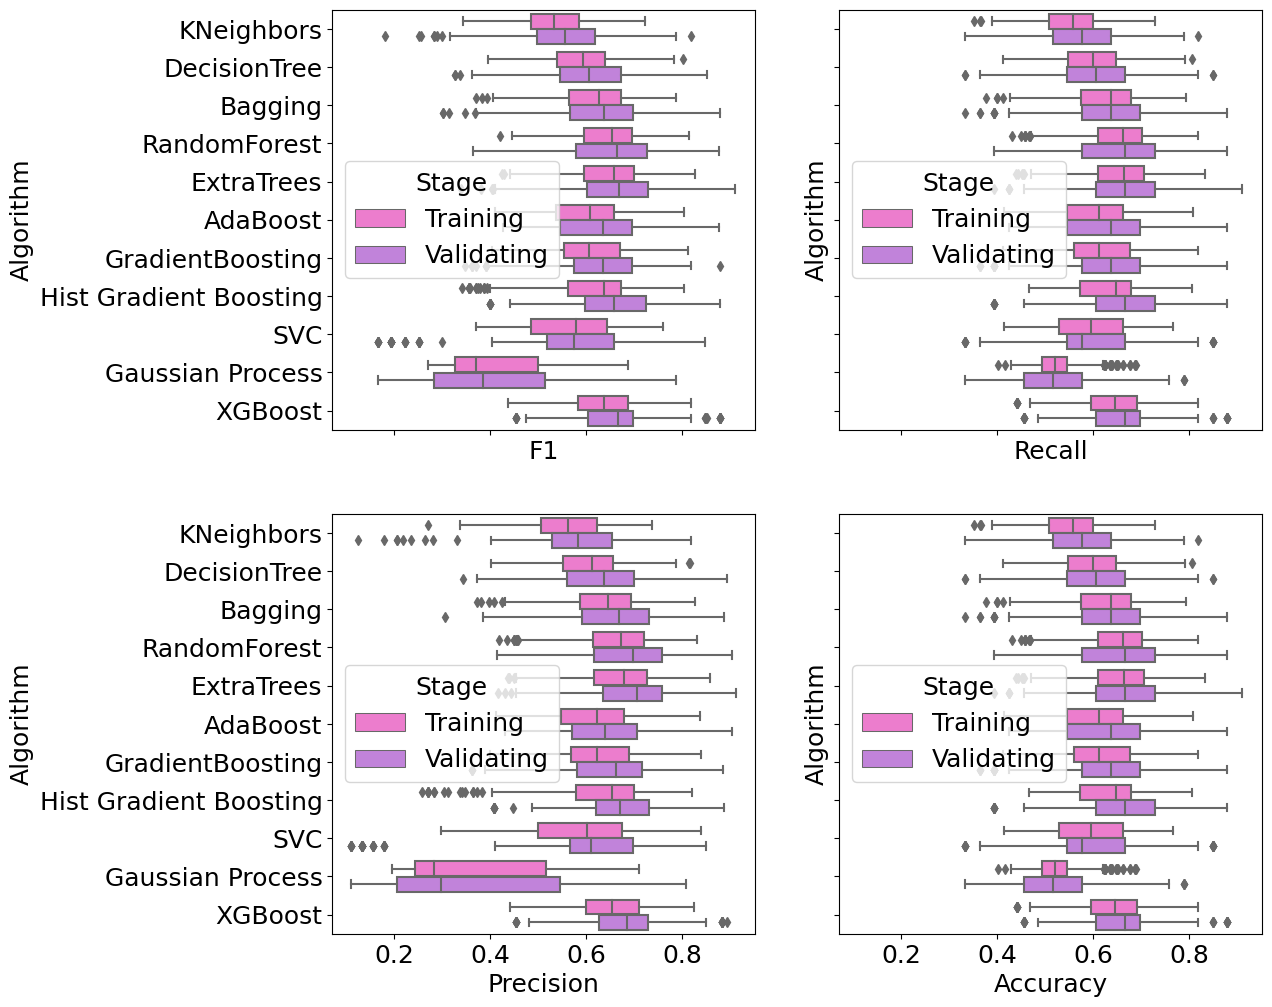

In [24]:
fig, axes = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0][0], data=df_concat, x="F1", hue="Stage", y="Algorithm")
ax2 = sns.boxplot(ax=axes[0][1], data=df_concat, x="Recall", hue="Stage", y="Algorithm")
ax3 = sns.boxplot(ax=axes[1][0], data=df_concat, x="Precision", hue="Stage", y="Algorithm")
ax4 = sns.boxplot(ax=axes[1][1], data=df_concat, x="Accuracy", hue="Stage", y="Algorithm")

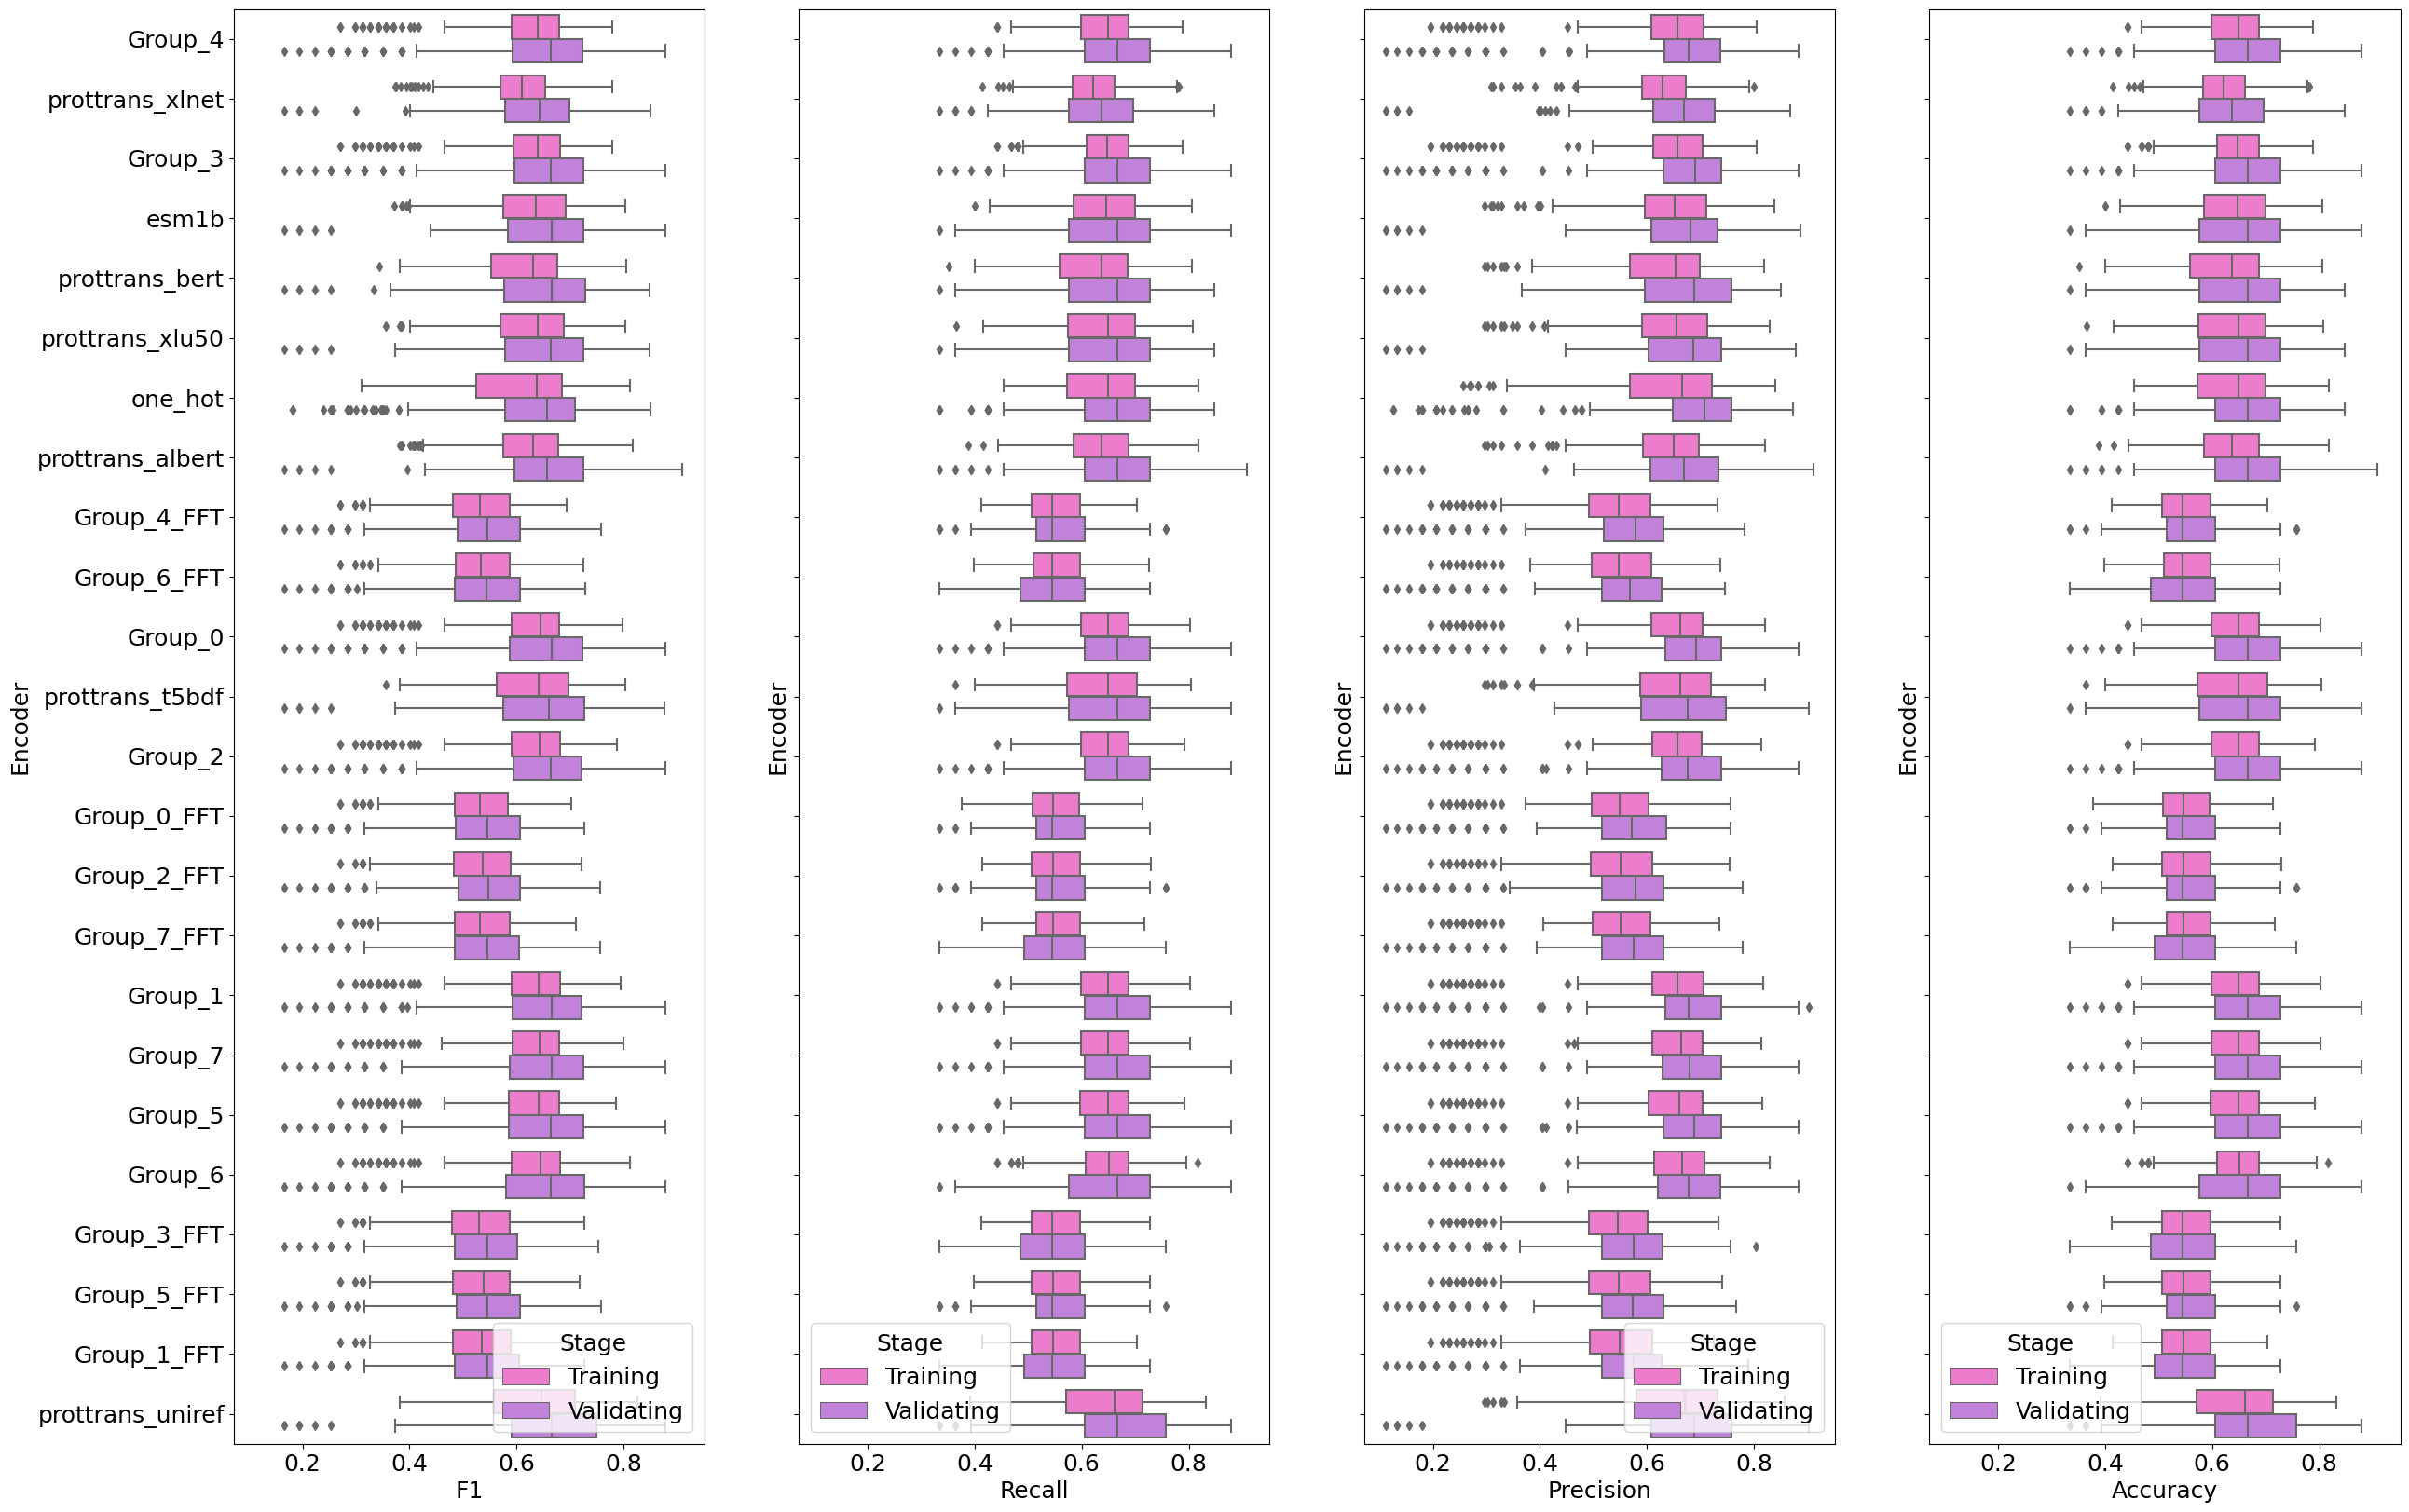

In [25]:
fig, axes = plt.subplots(1,4, figsize=(30,20), sharex=True, sharey=True)
ax1 = sns.boxplot(ax=axes[0], data=df_concat, x="F1", hue="Stage", y="Encoder")
ax2 = sns.boxplot(ax=axes[1], data=df_concat, x="Recall", hue="Stage", y="Encoder")
ax3 = sns.boxplot(ax=axes[2], data=df_concat, x="Precision", hue="Stage", y="Encoder")
ax4 = sns.boxplot(ax=axes[3], data=df_concat, x="Accuracy", hue="Stage", y="Encoder")

In [26]:
selection_instance = SelectionMethod()
df_selection = selection_instance.select(11, df_results_train, df_results_validation)
df_selection

,Algorithm,Encoder,mean_accuracy_training_x,mean_f_score_training_x,mean_precision_training_x,mean_recall_training_x,mean_accuracy_testing_x,mean_f_score_testing_x,mean_precision_testing_x,mean_recall_testing_x,mean_accuracy_testing_y,mean_f_score_testing_y,mean_precision_testing_y,mean_recall_testing_y,mean_accuracy_training_y,mean_f_score_training_y,mean_precision_training_y,mean_recall_training_y,Voting
76,ExtraTrees,Group_2,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,12
80,ExtraTrees,Group_4,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,12
88,ExtraTrees,esm1b,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,12


In [28]:
df_results_validation[(df_results_validation["Algorithm"] == "ExtraTrees") & (df_results_validation["Encoder"] == "esm1b")].describe()

,Accuracy,F1,Precision,Recall,MCC,Iteration
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.726263,0.724886,0.750940,0.726263,0.473247,5317.000000
std,0.081732,0.081834,0.078809,0.081732,0.155525,3286.978573
min,0.545455,0.545455,0.572028,0.545455,0.135873,91.000000
25%,0.666667,0.668059,0.704953,0.666667,0.376585,2267.750000
50%,0.727273,0.726764,0.759933,0.727273,0.481895,4890.000000
75%,0.787879,0.788274,0.813361,0.787879,0.570911,8344.750000
max,0.878788,0.877649,0.883217,0.878788,0.758626,9829.000000
